<a href="https://colab.research.google.com/github/MarleneChevalier/Optimisation/blob/master/Projet_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimisation : Regressions de Ridge et LASSO / Descente de gradient
====================================
Marlène Chevalier - Executive Master Statistique et Big Data

Juillet 2020 

Sujet :
====
Il s'agit d'un mini projet, sous forme d'un rapport expliquant les résultats obtenus à partir des méthodes d'optimisation vues en cours. Le package ScikitLearn ne devra pas être utilisé, sauf éventuellement pour vérifier les résultats obtenus.  
<http://scikit-learn.org/ Scikit-Learn>

**Les données choisies**  
Il s'agit de données concernant la consommation d'énergie dans un immeuble à basse consommation. Le fichier a été extrait de kaggle et vient de l'université de Mons (Belgique) : *KAG_energydata_complete.csv*.  
https://www.kaggle.com/loveall/appliances-energy-prediction  

Il est constitué de 19735 lignes qui constituent chacune un enregistrement de mesures faites entre janvier et mars 2016 sur 29 variables : 
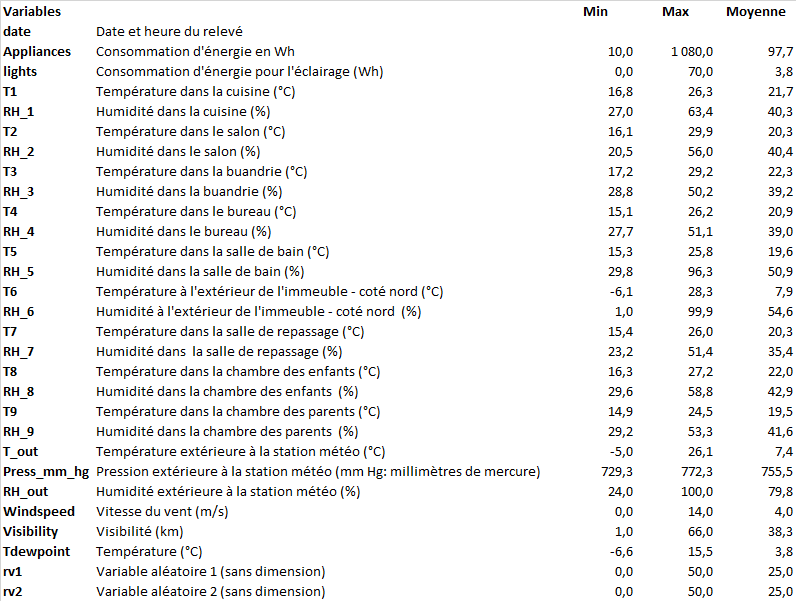   

Il n'y a pas de valeurs manquantes.


Librairies utilisées
====================================
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$
$\newcommand{\eqdef}{\equiv}$

In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sl
import statsmodels.api as sm
import pandas.util.testing as tm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Préparation des données
---------------


Chargement des données

In [19]:
#Fonction pour chargement via google collab
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#Chargement de la base de données
id = '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'
downloaded = drive.CreateFile({'id': '1FzqPcY8SVGV5etGI1rNM0bBc8n1btGGV'})
downloaded.GetContentFile('KAG_energydata_complete.csv')


In [20]:
data_energy = pd.read_csv('KAG_energydata_complete.csv')

Distribution de la consommation électrique

Consommation électrique moyenne :  97.7 W/h
Ecart type : 102.5
Consommation électrique médiane : 60.0 W/h


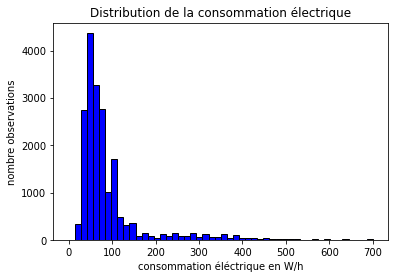

In [21]:
plt.hist(data_energy['Appliances'], range = (0, 700), bins = 50, color = 'blue',
            edgecolor = 'black')
plt.xlabel('consommation éléctrique en W/h')
plt.ylabel('nombre observations')
plt.title('Distribution de la consommation électrique')
print('Consommation électrique moyenne : ',round(np.mean(data_energy['Appliances']),1),'W/h')
print('Ecart type :',round(np.std(data_energy['Appliances']),1))
print('Consommation électrique médiane :',round(np.quantile(data_energy['Appliances'], 0.5),3),'W/h')

La consommation éléctrique est fortement concentrée entre 30 et 80 Wh, avec une valeur médiane à 60Wh.

Corrélation des variables du jeu de données

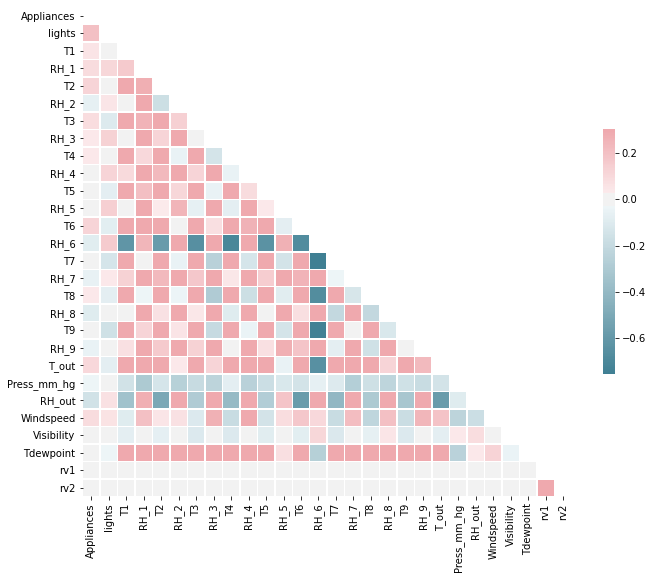

In [22]:
# Calcul des corrélations
corr = data_energy.corr()
# Masque triangle du graphique
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Parametres graphiques
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Tracé du graphe
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Il apparait de fortes corrélations : 
* entre les taux d'humidité extérieur et les mesures de température (RHT et T1 à T9): corrélations négatives 
* entre les températures entre elles (T1 à T9) : corrélation positive  
* entre la mesure de température (Tdewpoint) et les autres températures ainsi que les taux d'humidité

Aucune corrélation entre les variables aléatoires rv1 et rv2 et le reste des variables.

Séparons le jeu de données complet en un jeu d'apprentissage (80%) et un jeu de test (20%) . Le jeu d'apprentissage sera utilisé pour construire le modèle, le jeu test pour tester les performance prédictive du modèle.  

In [23]:
from sklearn.model_selection import train_test_split
# Générer l'ens de training. Fixer random_state pour répliquer les resultats ultérieurement.
train = data_energy.sample(frac=0.8, random_state=1)
# Sélectionner tout ce qui n'est pas dans le set de training et le mettre dans le set de test.
test = data_energy.loc[~data_energy.index.isin(train.index)]
# Afficher les dimensions des 2 sets.
print('dimension ensemble apprentisssage ', train.shape)
print('dimension ensemble test ',test.shape)

dimension ensemble apprentisssage  (15788, 29)
dimension ensemble test  (3947, 29)


Séparer les features $X$ de la variable à prédire $Y$ (Appliances) dans les ensembles de données d'apprentissage et test.
NB : nous conservons dans la matrice de design (features $X$ ) toutes les covariables hormis la date/heure et les 2 variables aléatoires (dont la signification n'est pas connue).

In [24]:
[n,p] = data_energy.shape

# separer la variable à prévoir (Y : Appliances) et des variables prédictives (X) 

# ensembles apprentissage et test pour la variable à predire
Y_train = train['Appliances'] # variable reponse
Y_test = test['Appliances'] # variable reponse

# ensembles apprentissage et test des variables prédictives
X = data_energy 
X_train = train 
X_test = test
X_train.drop(['Appliances', 'date', 'rv1','rv2'], axis=1,inplace=True) # variables features training
X_test.drop(['Appliances', 'date', 'rv1','rv2'], axis=1,inplace=True) # variables features test
[n_train,p_train] = X_train.shape
[n_test,p_test] = X_test.shape

# affichage des dimensions des matrices de design
print('la matrice de design complète contient: ',n,'lignes et ',p,'variables explicatives')
print('la matrice de design d apprentissage contient: ',n_train,'lignes et ',p_train,'variables explicatives')
print('la matrice de design test contient: ',n_test,'lignes et ',p_test,'variables explicatives')

la matrice de design complète contient:  19735 lignes et  29 variables explicatives
la matrice de design d apprentissage contient:  15788 lignes et  25 variables explicatives
la matrice de design test contient:  3947 lignes et  25 variables explicatives


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Normalisation des variables par la moyenne et l'écart type de l'ensemble d'apprentissage. 

In [25]:
mX_train = X_train.mean(axis=0)
sX_train = X_train.std(axis=0)
X_train = (X_train-mX_train)/sX_train
X_test= (X_test-mX_train)/sX_train
print(X_train )
print(X_test )


         lights        T1      RH_1  ...  Windspeed  Visibility  Tdewpoint
343   -0.477594 -1.700812  0.454964  ...   0.459769   -0.705808  -0.499086
13136  2.047607  0.563887  0.860538  ...  -0.016453    0.142330   0.734342
19315 -0.477594  1.871641  0.116145  ...   0.731896   -0.861300   0.770036
4706  -0.477594 -1.039669 -0.148361  ...  -0.696770   -1.412590  -0.875857
5322  -0.477594 -0.432498 -1.635888  ...  -0.832833   -1.384319  -1.232798
...         ...       ...       ...  ...        ...         ...        ...
11551 -0.477594  0.682207 -0.348629  ...  -0.084485   -0.069705   0.048223
13986 -0.477594  0.713344 -0.058933  ...  -0.424643    0.142330  -0.304752
1663  -0.477594 -2.742864  0.734583  ...  -0.016453   -2.062829   0.496382
11509 -0.477594 -0.307950 -0.222674  ...   0.051579   -0.705808   0.282217
14146 -0.477594 -0.058853 -0.761761  ...  -0.832833    0.142330  -0.677557

[15788 rows x 25 columns]
         lights        T1      RH_1  ...  Windspeed  Visibility  Tdewpoin

In [26]:
mY_train = Y_train.mean()
sY_train = Y_train.std()
Y_train = (Y_train-mY_train)/sY_train 
Y_test = (Y_test-mY_train)/sY_train 

Regression Linéaire
-----------------
Soit la relation linéaire entre les variables du jeu de données
sous forme matricielle :
  $ Y= X w $ .  
  avec $ Y :  $ vecteur de la variable consommation électrique   
  et  $ X :  $ matrice des covariables explicatives  
  n : nombre d'observations et p nombre total de variables 

Lorsque $ n > p $, le système peut se résoudre en utilisant les moindres carrés ordinaires  :
  $$ \umin{ w }  \norm{Xw-Y}^2 $$
les coefficients solution des MCO sont :
  $$ w_{MCO} = (X^\top X)^{-1} X^\top Y $$


In [27]:
w = np.linalg.solve( X_train.transpose().dot(X_train), X_train.transpose().dot(Y_train) )

Qualité de la prévision par les MCO

1- Graphique consommation électrique : Prevision / Vraie valeur 

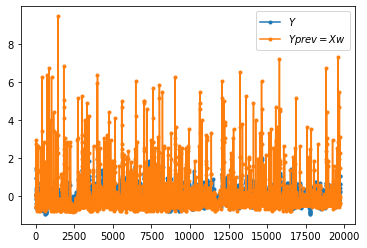

In [28]:
plt.clf
plt.plot( X_test.dot(w), '.-' )
plt.plot( Y_test, '.-' )
plt.axis('tight')
plt.legend(('$Y$', '$Yprev = $$X w$'));

Il apparait que la prédiction de la consommation électrique (Yprev) semble plus fluctuante que la vraie consommation.

2- Coefficient de détermination : R2

In [30]:
# R2
R2 = ((X_train.dot(w) - Y_train.mean())**2).sum() / ((Y_train - Y_train.mean())**2).sum()
print('R2 MCO : ',round(R2,3))

R2 MCO :  0.169


Text(0, 0.5, 'Résidus')

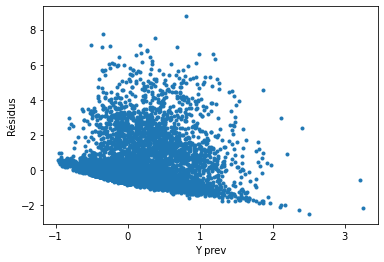

In [32]:
# graphique des résidus
plt.clf
plt.plot(X_train.dot(w), Y_train - X_train.dot(w), ".")
plt.xlabel("Y prev")
plt.ylabel("Résidus")

Le coefficient de determination (R2) obtenu n'est pas satisfaisant : il vaut 0.169 , ce qui signifie que le modèle explique que 16.9% de la variabilité de la variable "consommation éléctrique".
Effet, le graphique des résidus (résidus vs prévisions de la consommation électrique) indique une variance importante (nuage de points éparpillés). 
Cela est dû à des corrélations fortes entre les variables explicatives (comme vue avec la matrice de corrélation).

Erreurs de prévision évaluées sur l'ensemble de test :

 L'erreur relative de prédiction : $ERP = (Xw - Y)/Y$   
 La MSE (Mean squared error) : $({Xw-Y})^2 /n_{test}$

In [39]:
E_MCO = np.linalg.norm(X_test.dot(w)-Y_test) / np.linalg.norm(Y_test)
print('Erreur relative de prédiction : ' + str(E_MCO));

Erreur relative de prédiction : 0.9226314020060525


In [41]:
mse_MCO = np.sum( (X_test.dot(w)-Y_test)**2 ) / n_test
print('MSE MCO : ', mse_MCO)

MSE MCO :  0.8339458909412615


Regression linéaire avec la fonction OLS de statsmodels 

In [42]:
reg = sm.OLS(Y_train,X_train)
resReg = reg.fit()
print(resReg.summary())


                                 OLS Regression Results                                
Dep. Variable:             Appliances   R-squared (uncentered):                   0.169
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              127.8
Date:                Fri, 17 Jul 2020   Prob (F-statistic):                        0.00
Time:                        18:06:24   Log-Likelihood:                         -20945.
No. Observations:               15788   AIC:                                  4.194e+04
Df Residuals:                   15763   BIC:                                  4.213e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Les résultats de la regression linéaire par la fonction OLS sont les mêmes : le R2 très faible indique que la regression linéaire n'est pas satisfaisante pour expliquer la consommation d'électricité.

Nous devons tester des modèles plus performants avec un grand nombre de variables et qui supporte la colinéarité.

Descente de gradient

La méthode de descente de gradient est souvent plus efficace pour résoudre ce type de problème . Il s'agit alors de minimiser la fonction : 
$$ 
    \min_w J(w) = \frac{1}{2}\norm{X w-Y}^2.
$$

In [ ]:
def J(w): return 1/2*np.linalg.norm(X_train.dot(w)-Y_train)**2

Le gradient de la fonction $J$ est :
$$
    \nabla J(w) = X^\top (X w - Y).
$$

In [ ]:
def GradJ(w): return X_train.transpose().dot(X_train.dot(w)-Y_train)

Le pas maximal de la descente de gradient est :
$$
    \tau \leq \tau_\max \eqdef \frac{2}{\norm{XX^\top}_{op}}
$$
où $\norm{\cdot}_{op}$ est la valeur propre maximum.

In [ ]:
tau = 1/np.linalg.norm(X_train,2)**2

Nous initialisons le vecteur $w=0$.


Le pas de la descente de gradient est:
$$  w \leftarrow w - \tau \nabla J(w). $$

In [ ]:
w = np.zeros((p_train,1))
w = w - tau*GradJ(w)

In [ ]:
#tau_mult = [.1, .5, 1, 1.8]

__Exercise 0__

Display the evolution of the training error $J(w)$ as a function of the number of iterations.
Test for diffetent values of $\tau$.

In [ ]:
niter = 100
flist = np.zeros((niter,1))

tau_mult = [.1, .5, 1, 1.5, 1.8]
xopt = np.linalg.solve(X_train.transpose().dot(X_train), X_train.transpose().dot(Y_train)
#plt.clf

#fig, (ax1, ax2) = plt.subplots(2, 1)

#for itau in np.arange(0,5):
for itau in range(0,4):
    tau = tau_mult[itau]
    #tau = tau_mult[itau]/np.linalg.norm(X_train,2)**2
    x = np.zeros((p_train,1))
    for i in np.arange(0,niter):
        flist[i] = f(x)
        x = x - tau*Gradf(x)
    #plt.subplot(2,1,1)
    ax1.plot(flist)
    ax1.axis('tight')
    plt.title('f(x_k)')
    #plt.subplot(2,1,2)
    e = np.log10( flist-f(xopt) +1e-20)
    ax2.plot(e-e[0], label=str(tau_mult[itau]))
    ax2.axis('tight')
    leg = ax2.legend()
    #ax2.legend( str( tau_mult[itau] ) )
    plt.title('$log(f(x_k)-min J)$')

SyntaxError: ignored


Régression Régularisée de Ridge
=======
Les méthodes de régression régularisée ont pour objectif de réduire la variabilité du modèle, ce qui nécessite d'introduire un biais (arbitrage biais/variance). Ces méthodes consistnt à introduire une pénalité dans la fonction de perte à minimiser.

La régression régularisée de Ridge est definie par 
  $$ \umin{ w }  \norm{Xw-y}^2 + \lambda \norm{w}^2 $$
où $\lambda>0$ est le parametre de régularisation.
La pénalité est ici en norme L2 : $ \lambda \norm{w}^2 $

Les coefficients solution peuvent s'écrire : 
  $$ w0_{Ridge} = (X^\top X + \lambda \text{Id}_p )^{-1} X^\top Y, $$
  $$ w1_{Ridge} = X^\top ( XX^\top + \lambda \text{Id}_n)^{-1} Y, $$


In [44]:

Lambda = .2*np.linalg.norm(X_train)**2;
w0_Ridge = np.linalg.solve( X_train.transpose().dot(X_train) + Lambda*np.eye(p_train), X_train.transpose().dot(Y_train) )
u = np.linalg.solve( X_train.dot(X_train.transpose()) + Lambda*np.eye(n_train), Y_train )
w1_Ridge = X_train.transpose().dot( u )
print( ('l erreur relative entre w0_Ridge et w1_Ridge : ' + str( np.linalg.norm(w0_Ridge-w1_Ridge)/np.linalg.norm(w0_Ridge) ) ) )

l erreur : 1.6450867238359723e-15


L'erreur relative tend vers 0 : les vecteurs de coefficients w0_Ridge et w1_Ridge sont équivalents.

Voyons maintenant si on peut choisir $\lambda$ de manière optimale . Il s'agit de regarder l'evolution de l'erreur en fonction de $\lambda$.

Ridge: 98.86590373959955%


Text(0, 0.5, '$E$')

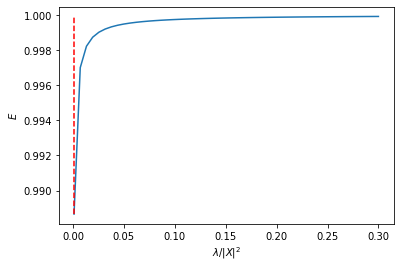

In [52]:
q = 50
lmax = np.linalg.norm(train,2)**2
lambda_list = lmax*np.linspace(.3,1e-3,q)
X = np.zeros( (p_train,q) )
E = np.zeros( (q,1) )
for i in np.arange(0,q):
    Lambda = lambda_list[i]
    x = np.linalg.solve( train.transpose().dot(train) + Lambda*np.eye(p_train), train.transpose().dot(Y_train) )
    X[:,i] = x.flatten() # bookkeeping
    E[i] = np.linalg.norm(train.dot(x)-Y_train) / np.linalg.norm(Y_train)
# find optimal lambda
i = E.argmin()
lambda0 = lambda_list[i]
xRidge = X[:,i]
print( 'Ridge: ' + str(E.min()*100) + '%' )
# Display error evolution.
plt.clf
plt.plot(lambda_list/lmax, E)
plt.plot( [lambda0/lmax,lambda0/lmax], [E.min(), E.max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|X|^2$')
plt.ylabel('$E$')

Ridge: 91.32604558679046%


Text(0, 0.5, '$E$')

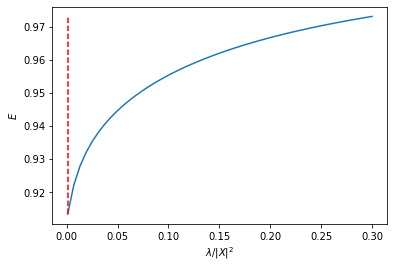

In [63]:
q = 50
lmax = np.linalg.norm(X_train,2)**2
lambda_list = lmax*np.linspace(.3,1e-3,q)
X = np.zeros( (p_train,q) )
E = np.zeros( (q,1) )
for i in np.arange(0,q):
    Lambda = lambda_list[i]
    x = np.linalg.solve(X_train.transpose().dot(X_train) + Lambda*np.eye(p_train), X_train.transpose().dot(Y_train) )
    X[:,i] = x.flatten() # bookkeeping
    E[i] = np.linalg.norm(X_train.dot(x)-Y_train) / np.linalg.norm(Y_train)
# lambda optimal
i = E.argmin()
lambda0 = lambda_list[i]
xRidge = X[:,i]
print( 'Ridge: ' + str(E.min()*100) + '%' )
# graphique des erreurs de prediction en fonction de lambda.
plt.clf
plt.plot(lambda_list/lmax, E)
plt.plot( [lambda0/lmax,lambda0/lmax], [E.min(), E.max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|X|^2$')
plt.ylabel('$E$')

__Exercise 2__

Display the regularization path, i.e. the evolution of $w$ as a function
of $\lambda$.

In [62]:
class_names = X_train['class_names']
plt.clf
for i in np.arange(0,p):
    #plt.plot(lambda_list/lmax, X[i,:], label=class_names[0][i])
    plt.plot(lambda_list/lmax, X[i,:])
plt.plot( [lambda0/lmax,lambda0/lmax], [X.flatten().min(), X.flatten().max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|X|^2$')
plt.ylabel('$x_i$')
plt.legend()

KeyError: ignored

Erreurs de prévision évaluées sur l'ensemble de test :

In [46]:
E_Ridge = np.linalg.norm(X_test.dot(w1_Ridge)-Y_test) / np.linalg.norm(Y_test)
print('Erreur relative de prédiction : ' + str(E_Ridge));

Erreur relative de prédiction : 0.9825819562982564


In [47]:
mse_Ridge = np.sum( (X_test.dot(w1_Ridge)-Y_test)**2 ) / n_test
print('MSE Ridge : ', mse_Ridge)

MSE Ridge :  0.9458428360869358


Régression Régularisée LASSO
---------------------
In order to perform feature selection (i.e. select a subsect of the
features which are the most predictive), one needs to replace the
$\ell^2$ regularization penalty by a sparsity inducing regularizer. The
most well known is the $\ell^1$ norm
$$ \norm{w}_1 \eqdef \sum_i \abs{w_i} . $$


The energy to minimize is
$$ \umin{w} J(w) \eqdef \frac{1}{2}\norm{X w-y}^2 + \lambda \norm{w}_1. $$

In [ ]:
def J(w,Lambda): return 1/2*np.linalg.norm(X_train.dot(w)-Y_train)**2 + Lambda*np.linalg.norm(w,1)

The simplest iterative algorithm to perform the minimization is the
so-called iterative soft thresholding (ISTA), aka proximal gradient aka
forward-backward.


It performs first a gradient step (forward) of the smooth part $\frac{1}{2}\norm{X w-y}^2$ of the
functional and then a proximal step (backward) step which account for the
$\ell^1$ penalty and induce sparsity. This proximal step is the soft-thresholding operator
$$ \Ss_s(x) \eqdef \max( \abs{x}-\lambda,0 ) \text{sign}(x).  $$

In [ ]:
def Soft(x,s): return np.maximum( abs(x)-s, np.zeros(x.shape)  ) * np.sign(x)

The ISTA algorithm reads
$$ w_{k+1} \eqdef \Ss_{\la\tau}( w_k - \tau X^\top ( X w_k - y )  ), $$
where, to ensure convergence, the step size should verify $ 0 < \tau <
2/\norm{X}^2  $ where $\norm{X}$ is the operator norm.


Display the soft thresholding operator.

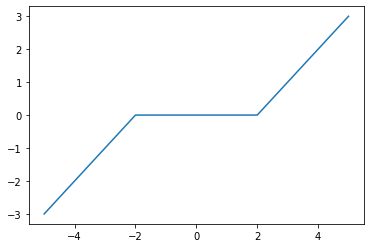

In [ ]:
t = np.linspace(-5,5,201)
plt.clf
plt.plot(t,Soft(t,2)) 
plt.axis('tight');

Descent step size.

In [ ]:
tau = 1.5/np.linalg.norm(X_train,2)**2

Choose a regularization parameter $\la$.

In [ ]:
lmax = abs( X_train.transpose().dot(Y_train) ).max()
Lambda = lmax /10

Initialization $w_0$.

In [ ]:
w = np.zeros((p,1))

A single ISTA step.

In [ ]:
C = X_train.transpose().dot(X_train)
u = X_train.transpose().dot(Y_train)
def ISTA(w,Lambda,tau): return Soft( w-tau*( C.dot(w)-u ), Lambda*tau )
w = ISTA(w,Lambda,tau)

__Exercise 3__

Implement the ISTA algorithm, display the convergence of the energy.

In [ ]:
niter = 400
flist = np.zeros((niter,1))
x = np.zeros((p,1))
for i in np.arange(0,niter):
    flist[i] = f(x,Lambda)
    x = ISTA(x,Lambda,tau)
ndisp = int(niter/4)

plt.clf
plt.subplot(2,1,1)
plt.plot(flist[0:ndisp])
plt.axis('tight')
plt.title('f(x_k)')
plt.subplot(2,1,2)
e = np.log10( flist[0:ndisp]-flist.min() +1e-20)
plt.plot(e-e[0])
plt.axis('tight')
plt.title('$log(f(x_k)-min f)$')

TypeError: ignored

__Exercise 4__

Compute the test error along the full regularization path. You can start by large $\lambda$ and use a warm restart procedure
to reduce the computation time. Compute the classification error.
ind optimal lambda
isplay error evolution.

Lasso: 65.42184378732037%


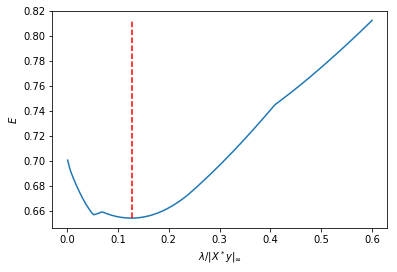

In [ ]:
q = 200
lambda_list = lmax*np.linspace(.6,1e-3,q)
X = np.zeros( (p,q) )
E = np.zeros( (q,1) )
x = np.zeros((p,1))
niter = 500
for iq in np.arange(0,q):
    Lambda = lambda_list[iq]
    # ISTA #
    for i in np.arange(0,niter):
        x = ISTA(x,Lambda,tau)
    X[:,iq] = x.flatten() # bookkeeping
    E[iq] = np.linalg.norm(A1.dot(x)-y1) / np.linalg.norm(y1)
# find optimal Lambda
i = E.argmin()
lambda0 = lambda_list[i]
xSparse = X[:,i]
print( 'Lasso: ' + str(E.min()*100) + '%' )
# Display error evolution.
plt.clf
plt.plot(lambda_list/lmax, E)
plt.plot( [lambda0/lmax,lambda0/lmax], [E.min(),E.max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|A^* y|_\infty$')
plt.ylabel('$E$')

__Exercise 5__

Display the regularization path, i.e. the evolution of $w$ as a function
of $\lambda$.
lot(lambda_list, W', 'LineWidth', 2);

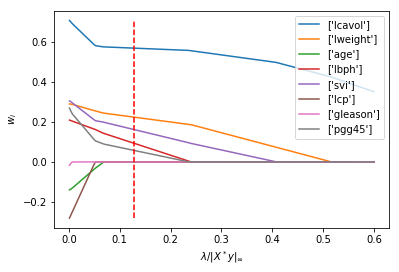

In [ ]:
plt.clf
for i in np.arange(0,p):
    plt.plot(lambda_list/lmax, X[i,:], label=class_names[0][i])
plt.plot( [lambda0/lmax,lambda0/lmax], [X.flatten().min(),X.flatten().max()], 'r--')
plt.axis('tight')
plt.xlabel('$\lambda/|A^* y|_\infty$')
plt.ylabel('$x_i$')
plt.legend()

__Exercise 6__

Compare the optimal weights for ridge and lasso.

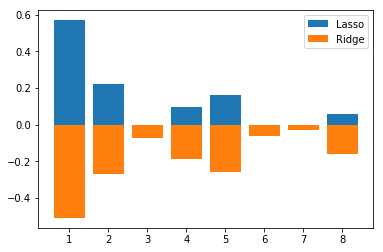

In [ ]:
plt.clf
plt.bar(np.arange(1,p+1), abs(xSparse))
plt.bar(np.arange(1,p+1), -abs(xRidge))
plt.legend(('Lasso', 'Ridge'))

<script>
  $(document).ready(function(){
      $('div.prompt').hide();
  });
</script>

<script>
  $(document).ready(function(){
      $('div.prompt').hide();
  });
</script>

Erreurs de prévision évaluées sur l'ensemble de test :

In [ ]:
E_Lasso = np.linalg.norm(X_test.dot(w1_Ridge)-Y_test) / np.linalg.norm(Y_test)
print('Erreur relative de prédiction : ' + str(E_Lasso));

In [ ]:
mse_Lasso = np.sum( (X_test.dot(w1_Ridge)-Y_test)**2 ) / n_test
print('MSE Lasso : ', mse_Lasso)